## Polynomial regression with scikit-learn

* Task: Use linear regression model to fit parameters $w$, $b$ on features/data that are non-linear or are a combination of other features


In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

### Create training data 

In [158]:
x = np.arange(0, 100, 1)
# print(f"x = {x}")

y = x**2   # Assume a non-linear relation
# print(f"y = {y}")

# Reshape features data to 2D array 
x = x.reshape(-1, 1) 
# print(f"x = {x}")

# Generate sample data with scikit-learn
# X, y = make_regression(n_samples=200, n_features=20, noise=0.1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Fit a linear regression model:

* StandardScaler(): Z-normalize features (mean=0, std=1) to stabilize and speed up convergence. <br> 

b = 3283.5
w = [2857.74093472]


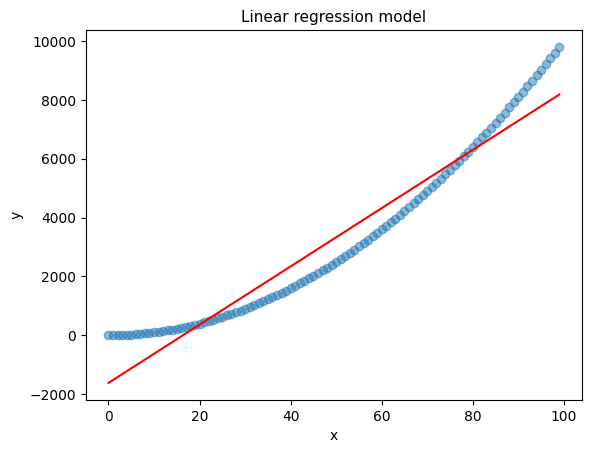

In [159]:
model = make_pipeline( 
    StandardScaler(),  # z-score normalization
    LinearRegression()
)

# Train the model
model.fit(x, y)

# Show model parameters
print("b =", model.named_steps['linearregression'].intercept_)
print("w =", model.named_steps['linearregression'].coef_)

# Predict y values
y_pred = model.predict(x) 

# Plot data and model
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred,  color="red")  
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear regression model", fontsize=11)
plt.show()

### Fit a polynomial regression model:

* PolynomialFeatures(degree=2): Expands the original features to include polynomial features, enabling LinearRegression to learn nonlinear relationship: [$x_1$] &rarr; [$x_1$ &nbsp; ${x_1}^2$]

b = 3283.5
w = [1.71775775e-12 2.95329664e+03]


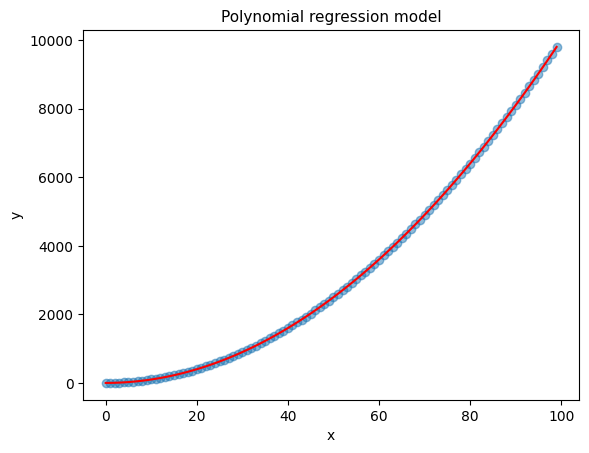

In [160]:
# Create a pipeline with polynomial transformation + scaling + SGD
model = make_pipeline( 
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),  # z-score normalization
    LinearRegression()
)

# Train the model
model.fit(x, y)

# Show model parameters
print("b =", model.named_steps['linearregression'].intercept_)
print("w =", model.named_steps['linearregression'].coef_)

# Predict y values
y_pred = model.predict(x) 

# Plot data and model
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred,  color="red")  
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial regression model", fontsize=11)
plt.show()

### Selecting features

* Assume a non-linear relation without prior knowledge which term is required
* Add a variety of potential features and try to find the most useful &rarr; PolynomialFeatures(degree=4)
* Gradient descent will pick the correct features by emphasizing its associate parameters
* The longer GD runs, the more it will reduce the impact of those terms that are less useful


b = 3283.5
w = [ 6.67008310e-12  2.95329664e+03  2.13731255e-11 -8.64019967e-12]


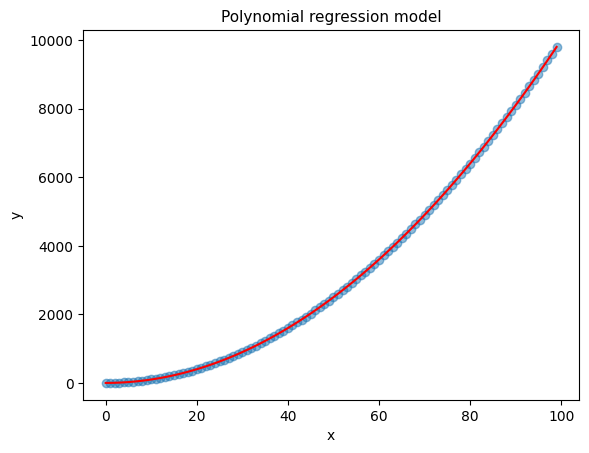

In [163]:
# Create a pipeline with polynomial transformation of 4d degree + scaling + SGD
model = make_pipeline( 
    PolynomialFeatures(degree=4, include_bias=False),    
    StandardScaler(),   
    LinearRegression()
)

# Train the model
model.fit(x, y)

# Show model parameters
print("b =", model.named_steps['linearregression'].intercept_)
print("w =", model.named_steps['linearregression'].coef_)

# Predict y values
y_pred = model.predict(x) 
    
# Plot data and model
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred,  color="red")  
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial regression model", fontsize=11)
plt.show()